<a href="https://colab.research.google.com/github/fabiojovancha/FoodLergic/blob/Machine-Learning/fork_of_food_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras import models
from PIL import Image
from skimage.io import imread
import cv2

K.clear_session()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/My Drive/Capstone/dataset'

# Check Dataset

In [ ]:
import os
from PIL import Image, UnidentifiedImageError

def check_images(directory):
    valid_image_count = 0  # Initialize counter for valid images
    print(f"Checking images in {directory}...")

    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Verify if the file is a valid image
                print(f"Valid image: {file_path}")
                valid_image_count += 1  # Increment the valid image counter
            except (UnidentifiedImageError, OSError) as e:
                print(f"Invalid image detected: {file_path} - {e}")
                os.remove(file_path)  # Delete the invalid image file

    print(f"\nTotal valid images: {valid_image_count}")  # Print the count of valid images

# Call the function with the base directory
check_images(base_dir)


Checking images in /content/drive/My Drive/Capstone/dataset...
Valid image: /content/drive/My Drive/Capstone/dataset/telur/telur-balado-1.png
Valid image: /content/drive/My Drive/Capstone/dataset/telur/telur-balado-2.png
Valid image: /content/drive/My Drive/Capstone/dataset/telur/telur-balado-3.png
Valid image: /content/drive/My Drive/Capstone/dataset/telur/telur-balado-4.png
Valid image: /content/drive/My Drive/Capstone/dataset/telur/telur-balado-6.png
Valid image: /content/drive/My Drive/Capstone/dataset/telur/telur-balado-8.png
Valid image: /content/drive/My Drive/Capstone/dataset/telur/telur-balado-9.png
Valid image: /content/drive/My Drive/Capstone/dataset/telur/telur-balado-10.png
Valid image: /content/drive/My Drive/Capstone/dataset/telur/martabak-telur-1.png
Valid image: /content/drive/My Drive/Capstone/dataset/telur/martabak-telur-2.png
Valid image: /content/drive/My Drive/Capstone/dataset/telur/martabak-telur-3.png
Valid image: /content/drive/My Drive/Capstone/dataset/telur/m

# <b>IMAGE PROCESSSING</b>

In [ ]:
from PIL import Image
import numpy as np

# Open the image using PIL
try:
    img = Image.open('/content/drive/MyDrive/Capstone/dataset/ayam/mie-ayam-2.png')

    # Convert the image to RGB (if it's in another format like RGBA or grayscale)
    img = img.convert("RGB")

    # Convert the image to a NumPy array
    img_array = np.array(img)

    # Check the shape of the image array
    dims = np.shape(img_array)

    # Reshape the image into a 2D matrix: (height * width, 3) for RGB
    matrix = np.reshape(img_array, (dims[0] * dims[1], dims[2]))

    # Print the shape of the reshaped matrix
    print(np.shape(matrix))

except Exception as e:
    print(f"Error loading image: {e}")


(409600, 3)


In [ ]:
from PIL import Image
import numpy as np

# Open the image using PIL
try:
    img = Image.open('/content/drive/MyDrive/Capstone/dataset/ayam/mie-ayam-2.png')

    # Convert the image to RGB (if it's in another format like RGBA or grayscale)
    img = img.convert("RGB")

    # Convert the image to a NumPy array
    img_array = np.array(img)

    # Check the shape of the image array
    dims = np.shape(img_array)

    # Reshape the image into a 2D matrix: (height * width, 3) for RGB
    matrix = np.reshape(img_array, (dims[0] * dims[1], dims[2]))

    # Print the shape of the reshaped matrix
    print(np.shape(matrix))

except Exception as e:
    print(f"Error loading image: {e}")


(409600, 3)


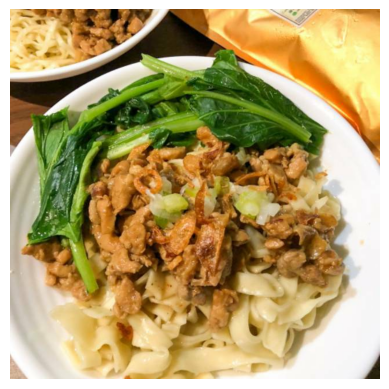

Image shape ->  (640, 640)
Color channels ->  3
Min color depth : 0, Max color depth : 255


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load an image using PIL
img = Image.open('/content/drive/MyDrive/Capstone/dataset/ayam/mie-ayam-2.png')

# Convert the image to a NumPy array
img = np.array(img)

# Get image dimensions
dims = img.shape

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis for better visualization
plt.show()

# Print image properties
print("Image shape -> ", dims[:2])  # Height and width
print("Color channels -> ", dims[2])  # Number of color channels
print("Min color depth : {}, Max color depth : {}".format(np.min(img), np.max(img)))


<h2>Plot for visualizing pixel intensities for RGB in color space</h2>

In [ ]:
sns.distplot(matrix[:,0], bins=20,color="red",hist_kws=dict(alpha=0.3))
sns.distplot(matrix[:,1], bins=20,color="green",hist_kws=dict(alpha=0.35))
sns.distplot(matrix[:,2], bins=20,color="blue",hist_kws=dict(alpha=0.2))
plt.show()

NameError: name 'sns' is not defined

<h2>Plot for visualizing histogram between 2 color channel</h2>

In [ ]:
_ = plt.hist2d(matrix[:,1], matrix[:,2], bins=(50,50))
plt.xlabel('Green channel')
plt.ylabel('Blue channel')
plt.show()

- <span style="font-size:18px;color:blue"><b>The pixels between green and blue bands are correlated (as evident from overlapping on above graph), and typically has visible imagery.</b></span>

- <span style="font-size:18px;color:blue"><b>Raw band differences will need to be scaled or thresholded </b></span>

<span style="font-size:15px;"><b>Image data consists of variations due to resolution differences between scenes, pixel intensities of an image and the environment around which the image was taken. This area of image processing is critical in today's time with the rise of Artificial intelligence.From motion detection to complex circuits in self driving car, the research requires tremendous amount of work and can be seen as widely growing areas of computer vision.</b><span>

In [ ]:
from sklearn import cluster
n_vals=[2,4,6,8]
plt.figure(1, figsize=(12, 8))

for subplot,n in enumerate(n_vals):
    kmeans=cluster.KMeans(n)
    clustered = kmeans.fit_predict(matrix)
    dims = np.shape(img)
    clustered_img = np.reshape(clustered, (dims[0], dims[1]))
    plt.subplot(2,2, subplot+1)
    plt.title("n = {}".format(n), pad = 10,size=18)
    plt.imshow(clustered_img)

plt.tight_layout()

<h2> Let's visualize the channel intensity for every cluster we just generated.</h2>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(14,10))

ax = [fig.add_subplot(221, projection='3d'),
      fig.add_subplot(222, projection='3d'),
      fig.add_subplot(223, projection='3d'),
      fig.add_subplot(224, projection='3d')]

for plot_number,n in enumerate(n_vals):

    kmeans=cluster.KMeans(n)
    clustered = kmeans.fit_predict(matrix)
    x1, y1, z1 = [np.where(clustered == x)[0] for x in [0, 1, 2]]

    plot_vals = [('r', x1),
                 ('b', y1),
                 ('g', z1),
                 ]

    for c, channel in plot_vals:
        x = matrix[channel, 0]
        y = matrix[channel, 1]
        z = matrix[channel, 2]
        ax[plot_number].scatter(x, y, z, c=c,s=10)

    ax[plot_number].set_xlabel('Blue channel')
    ax[plot_number].set_ylabel('Green channel')
    ax[plot_number].set_zlabel('Red channel')

plt.tight_layout()

<center><span style="font-size:18px;color:blue"><b>It is evident from above graph, intensity is reduced in the color space as the number of clusters are increased.</b></span></center>

<h2> Brightness normalization is a process that changes the range of pixel intensity values. Applications include photographs with poor contrast due to glare, for example. Normalization is sometimes called contrast stretching or histogram stretching. </h2>

In [ ]:
bnorm = np.zeros_like(matrix, dtype=np.float32)
max_range = np.max(matrix, axis=1)
bnorm = matrix / np.vstack((max_range, max_range, max_range)).T
bnorm_img = np.reshape(bnorm, (dims[0],dims[1],dims[2]))
plt.figure(figsize=(8,10))
plt.imshow(bnorm_img)
plt.show()

 <h2> Sobel filter is a basic way to get an edge magnitude/gradient image. </h2>
    
**It works by calculating the gradient of image intensity at each pixel within the image. It finds the direction of the largest increase from light to dark and the rate of change in that direction.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel, sobel_h

# Convert img to a NumPy array (if not already)
img = np.array(img)

plt.figure(1, figsize=(20, 15))
cmap = "YlGnBu"

plt.subplot(3, 1, 1)
plt.imshow(img)

plt.subplot(3, 1, 2)
plt.imshow(sobel(img[:, :, 2]), cmap=cmap)

plt.subplot(3, 1, 3)
plt.imshow(sobel_h(img[:, :, 1]), cmap=cmap)

plt.tight_layout()


<center><span style="font-size:18px;color:blue"><b>Clearly the results are fascinating. We are able to isolate object and detect the edge. </b></span></center>

<h2> Let's apply Principal Component Analysis. It is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space.</h2>

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(3)
pca.fit(matrix)
img_pca = pca.transform(matrix)
img_pca = np.reshape(img_pca, (dims[0], dims[1], dims[2]))

fig = plt.figure(figsize=(8, 8))
plt.imshow(img_pca[:,:,1], cmap=cmap)

# <b>Data Splitting</b>

In [ ]:
import os
from sklearn.model_selection import train_test_split

# Define the source dataset path
dataset_path = '/content/drive/MyDrive/Capstone/dataset'  # Adjust path as needed

# List all subdirectories (assuming each subdirectory represents a class)
categories = os.listdir(dataset_path)

# Initialize lists to hold file paths and labels
image_paths = []
labels = []

# Loop through each category (class)
for label, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        # List all image files in the category folder
        for img_file in os.listdir(category_path):
            if img_file.endswith(".png") or img_file.endswith(".jpg"):
                img_path = os.path.join(category_path, img_file)
                image_paths.append(img_path)
                labels.append(label)

# Split dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(image_paths, labels, test_size=0.3, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print out the size of each dataset split
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

# Optionally, print a few file paths to verify the split
print("Some training file paths:", X_train[:5])
print("Some validation file paths:", X_val[:5])
print("Some testing file paths:", X_test[:5])


Training set size: 840
Validation set size: 180
Test set size: 180
Some training file paths: ['/content/drive/MyDrive/Capstone/dataset/wijen/Copy of ayam-wijen-4.png', '/content/drive/MyDrive/Capstone/dataset/ikan/Copy of gohu_ikan (3).png', '/content/drive/MyDrive/Capstone/dataset/gandum/putu_mayang (5).png', '/content/drive/MyDrive/Capstone/dataset/coklat/Salinan kue-pukis-8.png', '/content/drive/MyDrive/Capstone/dataset/kacang_tanah/rujak-cingur-9.png']
Some validation file paths: ['/content/drive/MyDrive/Capstone/dataset/Sapi/sate_sapi (2).png', '/content/drive/MyDrive/Capstone/dataset/ayam/Copy of soto-ayam-7.png', '/content/drive/MyDrive/Capstone/dataset/telur/Copy of telur-ceplok-9.png', '/content/drive/MyDrive/Capstone/dataset/kerang/Copy of kerang-saus-padang-5.png', '/content/drive/MyDrive/Capstone/dataset/kacang_kedelai/tempe_mendoan (2).png']
Some testing file paths: ['/content/drive/MyDrive/Capstone/dataset/ayam/Copy of opor-ayam-2.png', '/content/drive/MyDrive/Capstone/da

# <b>Exploratory Data Analysis (EDA)</b>

## Let's visualize number of training examples for each food item

In [ ]:
main='/content/drive/MyDrive/Capstone/dataset'

data=dict()

for i in os.listdir(main):
    sub_dir=os.path.join(main,i)
    count=len(os.listdir(sub_dir))
    data[i]=count


keys = data.keys()
values = data.values()

colors=["red" if x<= 150 else "green" for x in values]

fig, ax = plt.subplots(figsize=(12,8))
y_pos=np.arange(len(values))
plt.barh(y_pos,values,align='center',color=colors)
for i, v in enumerate(values):
    ax.text(v+1.4, i-0.25, str(v), color=colors[i])
ax.set_yticks(y_pos)
ax.set_yticklabels(keys)
ax.set_xlabel('Images',fontsize=16)
plt.xticks(color='black',fontsize=13)
plt.yticks(fontsize=13)
plt.show()

<h3>We notice that 2 classes (Pani puri and Kulfi) lacks behind with training data.</h3>

> - <span style="font-size:18px;color:blue">Data augmentation helps with classes not having enough training examples by increasing the amount of relevant data in the dataset.</span>
<br><br>
> - <span style="font-size:18px;color:blue"> We would be doing what is known as **offline augmentation**. It works on relatively smaller datasets, by increasing the size of the dataset by a factor equal to the number of transformations you perform. (For example, by flipping all my images, it would increase the size of the dataset by a factor of 2).</span>
<br><br>
> - <span style="font-size:18px;color:blue"><u>You will get more clarity in the coming section</u></span>

## Let's visualize our dataset by randomly picking an image from every class

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError

# Validate images before visualization
def validate_image(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()  # Verify the image
        return True  # Image is valid
    except (UnidentifiedImageError, OSError):
        return False  # Image is invalid

# List to store validated image paths
validated_X_train = [path for path in X_train if validate_image(path)]

# Process validated images
images = []
displayed_images = []  # List to store successfully visualized images

# Loop through each validated image path
for image_path in validated_X_train:
    category = image_path.split('/')[-2]  # Get the category from the path

    try:
        with Image.open(image_path) as img:
            # Convert grayscale images to RGB if needed
            if img.mode != 'RGB':
                img = img.convert('RGB')

            # Convert to NumPy array for visualization
            img_array = np.array(img)

        # Add the image and category to the list
        images.append(img_array)
        displayed_images.append((category, image_path))
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        continue

# Set up the figure for displaying images
fig = plt.figure(1, figsize=(25, 25))

# Loop through and display images
for subplot, image_ in enumerate(images[:8]):  # Limit to 8 images
    category, _ = displayed_images[subplot]
    ax = plt.subplot(4, 2, subplot + 1)
    ax.set_title(category, pad=10, size=18)
    ax.imshow(image_)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Print details of successfully visualized images
print("Visualized Images:")
for i, (category, image_path) in enumerate(displayed_images[:12]):
    print(f"{i + 1}. Category: {category}, File Path: {image_path}")


<hr>

## We discussed Data Augmentation before. Let's see how it works:
<span style="font-size:16px"> 1. Accepting a batch of images used for training.</span>

<span style="font-size:16px"> 2. Taking this batch and applying a series of random transformations to each image in the batch. (including random rotation, resizing, shearing, etc.)</span>

<span style="font-size:16px"> 3. Replacing the original batch with the new, randomly transformed batch.</span>

<span style="font-size:16px"> 4. Training the CNN on this randomly transformed batch. (i.e, the original data itself is not used for training)</span>

<center><img src="https://miro.medium.com/max/1700/1*ae1tW5ngf1zhPRyh7aaM1Q.png" width=500></center>

<hr>

# Data Augmentation

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from PIL import Image

# Parameters
img_width, img_height = 299, 299
batch_size = 16
n_classes = len(set(labels))  # Number of classes from labels

# Helper function to preprocess images
def preprocess_images(image_paths, target_size):
    images = []
    for img_path in image_paths:
        try:
            with Image.open(img_path) as img:
                img = img.resize(target_size)  # Resize to target dimensions
                if img.mode != 'RGB':
                    img = img.convert('RGB')  # Ensure all images are RGB
                img_array = np.array(img) / 255.0  # Normalize pixel values
                images.append(img_array)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
    return np.array(images)

# Preprocess datasets
X_train_images = preprocess_images(X_train, (img_width, img_height))
X_val_images = preprocess_images(X_val, (img_width, img_height))
X_test_images = preprocess_images(X_test, (img_width, img_height))

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=n_classes)
y_val_one_hot = to_categorical(y_val, num_classes=n_classes)
y_test_one_hot = to_categorical(y_test, num_classes=n_classes)

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rotation_range=20,         # Reduced rotation range
    width_shift_range=0.2,     # Reduced width shift
    height_shift_range=0.2,    # Reduced height shift
    zoom_range=0.2,            # Reduced zoom range
    horizontal_flip=True       # Horizontal flip only
)

# Validation and test generators (only rescaling)
val_test_datagen = ImageDataGenerator()

# Create data generators
train_generator = train_datagen.flow(
    X_train_images, y_train_one_hot, batch_size=batch_size)

val_generator = val_test_datagen.flow(
    X_val_images, y_val_one_hot, batch_size=batch_size)

test_generator = val_test_datagen.flow(
    X_test_images, y_test_one_hot, batch_size=batch_size)

# Print dataset sizes
print(f"Training samples: {len(train_generator)} batches")
print(f"Validation samples: {len(val_generator)} batches")
print(f"Test samples: {len(test_generator)} batches")


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training samples: 53 batches
Validation samples: 12 batches
Test samples: 12 batches


In [ ]:
class_map = {i: category for i, category in enumerate(categories)}
print(class_map)

{0: 'telur', 1: 'kerang', 2: 'ayam', 3: 'gandum', 4: 'ikan', 5: 'kacang_kedelai', 6: 'Sapi', 7: 'wijen', 8: 'susu', 9: 'kacang_tanah', 10: 'udang', 11: 'coklat'}


In [ ]:
# print(tf.__version__)
# print(tf.test.gpu_device_name())

# <b> MODEL TRAINING </b>

## Training the model

In [ ]:
# #V 0.0
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
# from tensorflow.keras import regularizers

# # Model Parameters
# n_classes = 12
# img_width, img_height = 299, 299
# batch_size = 16
# nb_train_samples = 840
# nb_validation_samples = 180

# # Build the model
# model = Sequential()

# # 1. Input layer with a Conv2D layer (Kernel: 3x3, 32 filters)
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))

# # 2. MaxPooling layer
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # 3. Second Conv2D layer
# model.add(Conv2D(64, (3, 3), activation='relu'))

# # 4. MaxPooling layer
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # 5. Third Conv2D layer
# model.add(Conv2D(128, (3, 3), activation='relu'))

# # 6. MaxPooling layer
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # 7. Flatten the output
# model.add(Flatten())

# # 8. Fully connected (Dense) layer
# model.add(Dense(128, activation='relu'))

# # 9. Dropout to reduce overfitting
# model.add(Dropout(0.2))

# # 10. Output layer with softmax activation for multi-class classification
# mode

# # Col.add(Dense(n_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))mpile the model
# model.compile(
#     optimizer=SGD(learning_rate=0.0001, momentum=0.9),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# # Callbacks for saving best model and logging training history
# checkpointer = ModelCheckpoint(filepath='cnn_model_best.keras', verbose=1, save_best_only=True)
# csv_logger = CSVLogger('cnn_model_history.log')

# # Train the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=nb_train_samples // batch_size,
#     validation_data=val_generator,
#     validation_steps=nb_validation_samples // batch_size,
#     epochs=20,
#     verbose=2,
#     callbacks=[csv_logger, checkpointer]
# )


In [ ]:
# #V 0.1

# from tensorflow.keras.applications import InceptionV3
# from tensorflow.keras.models import Model, Sequential  # Import Sequential
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping
# from tensorflow.keras import regularizers  # Import regularizers if using regularization
# from tensorflow.keras.optimizers import SGD

# n_classes = 12
# img_width, img_height = 299, 299
# batch_size = 16

# # Load InceptionV3 pre-trained on ImageNet (without the top layer)
# base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# # Freeze the base model layers to prevent them from being updated during training
# base_model.trainable = False

# # Build the new model on top of the base model
# model = Sequential()

# # Add the pre-trained base model
# model.add(base_model)

# # Add a global average pooling layer to reduce the output dimensions
# model.add(GlobalAveragePooling2D())

# # Add a fully connected (Dense) layer
# model.add(Dense(256, activation='relu'))

# # Dropout to reduce overfitting
# model.add(Dropout(0.3))

# # Add a fully connected (Dense) layer
# model.add(Dense(128, activation='relu'))

# # Dropout to reduce overfitting
# model.add(Dropout(0.3))

# # Output layer with softmax activation for multi-class classification
# model.add(Dense(n_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))

# # Compile the model
# model.compile(
#     optimizer=SGD(learning_rate=0.0001, momentum=0.9),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 8, 8, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,361,772 (85.30 MB)

 Trainable params: 558,988 (2.13 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model, Sequential  # Import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers  # Import regularizers if using regularization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# base_model.trainable = False  # Freeze the base model

# Parameters
n_classes = 12

# Load the InceptionV3 base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# base_model.trainable = False  # Freeze the base model

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization
    Dropout(0.5),
    Dense(n_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.01))  # L2 regularization
])

# Unfreeze layers
for layer in base_model.layers[-10:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 8, 8, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           3,084 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,330,412 (85.18 MB)

 Trainable params: 22,295,980 (85.05 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping

# Callbacks for saving best model and logging training history
checkpointer = ModelCheckpoint(filepath='cnn_model_best.keras', verbose=1, save_best_only=True)
csv_logger = CSVLogger('cnn_model_history.log')
ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    initial_epoch=history.epoch[-1] if 'history' in locals() else 0,  # Resume from the last epoch if available
    callbacks=[csv_logger, checkpointer, ReduceLROnPlateau, early_stopping]
)

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1919 - loss: 7.0983
Epoch 1: val_loss improved from inf to 6.08714, saving model to cnn_model_best.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.1940 - loss: 7.0918 - val_accuracy: 0.5167 - val_loss: 6.0871 - learning_rate: 1.0000e-04
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.7053 - loss: 5.6289
Epoch 2: val_loss improved from 6.08714 to 4.90435, saving model to cnn_model_best.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 462ms/step - accuracy: 0.7053 - loss: 5.6259 - val_accuracy: 0.8111 - val_loss: 4.9044 - learning_rate: 1.0000e-04
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.8427 - loss: 4.8374
Epoch 3: val_loss improved from 4.90435 to 4.45925, saving model to cnn_model_best.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 32s 561ms/step - accuracy: 0.8429 - loss: 4.8355 - val_accuracy: 0.8778 - val_loss: 4.4593 - learning_rate: 1.0000e-04
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4

## Loading the Model

In [ ]:
# # Load the saved model
# model = load_model('/content/drive/My Drive/Capstone/Saved Model/Classification_Head_model_v1.keras')

## Saving the model

In [ ]:
# Save the model with a .keras extension
model.save('/content/drive/My Drive/Capstone/Saved Model/Fine_Tuned(-10)_v1.0[90%].keras')


## Accuracy and Loss curves

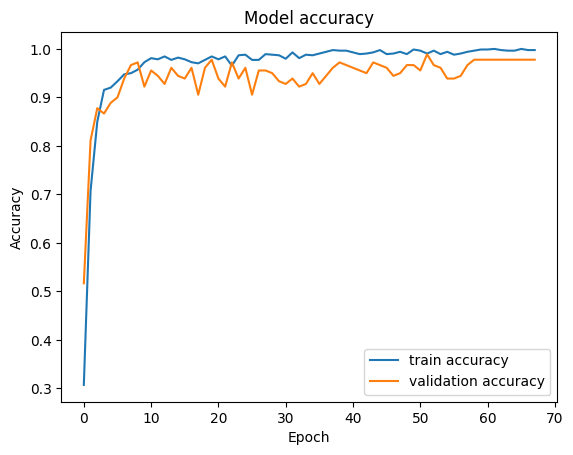

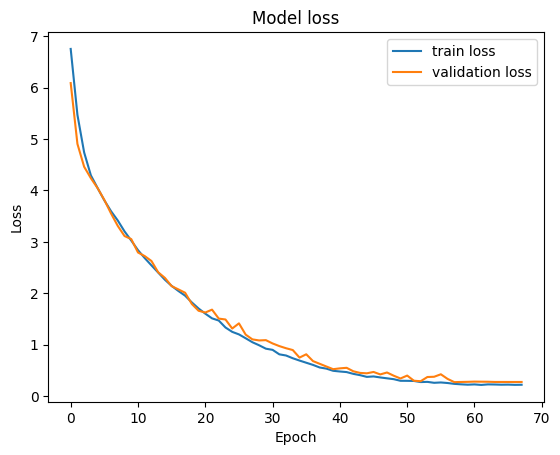

In [ ]:
import matplotlib.pyplot as plt  # Add this line

def plot_accuracy(history):

    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()

def plot_loss(history):

    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()

plot_accuracy(history)
plot_loss(history)

# <b> PREDICTIONS </b>

## Load the model

In [ ]:
K.clear_session()
path_to_model = '/content/drive/My Drive/Capstone/Saved Model/Fine_Tuned(-10)_v1.0[90%].keras'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


## Testing model on test set

In [ ]:
# Evaluate the model using the test generator
scores = model.evaluate(test_generator, steps=len(test_generator))

# Print the test accuracy
print("Test Accuracy: {:.3f}".format(scores[1]))


12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 516ms/step - accuracy: 0.9460 - loss: 0.4631
Test Accuracy: 0.922


In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
import numpy as np

# Load the trained model
# model = load_model('/content/drive/My Drive/Capstone/Saved Model/Fine_Tuned(-10)_v1.0[90%].keras')

# Predict using the model
y_pred = model.predict(X_test_images)

# Convert the predictions from probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test_one_hot back to class labels
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Print classification report
report = classification_report(y_true_classes, y_pred_classes)
print(report)


6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       0.87      0.87      0.87        15
           3       1.00      0.87      0.93        15
           4       1.00      1.00      1.00        15
           5       1.00      0.87      0.93        15
           6       1.00      0.87      0.93        15
           7       1.00      1.00      1.00        15
           8       0.76      0.87      0.81        15
           9       0.85      0.73      0.79        15
          10       0.79      1.00      0.88        15
          11       1.00      1.00      1.00        15

    accuracy                           0.92       180
   macro avg       0.93      0.92      0.92       180
weighted avg       0.93      0.92      0.92       180



## Function to predict single image or predict all images from a directory

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Updated categories dictionary
category = {
    0: 'telur', 1: 'kerang', 2: 'ayam', 3: 'gandum', 4: 'ikan',
    5: 'kacang_kedelai', 6: 'Sapi', 7: 'wijen', 8: 'susu',
    9: 'kacang_tanah', 10: 'udang', 11: 'coklat'
}

# Function to predict a single image
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(299, 299))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.  # Normalize the image

    prediction = model.predict(img_processed)

    index = np.argmax(prediction)  # Get the index of the highest prediction

    plt.title("Prediction - {}".format(category[index]))
    plt.imshow(img_array)

# Function to predict a directory of images and compute accuracy
def predict_dir(filedir, model):
    cols = 5
    pos = 0
    images = []
    total_images = len(os.listdir(filedir))
    rows = total_images // cols + 1

    true = filedir.split('/')[-1]  # Assume folder name is the true label

    fig = plt.figure(1, figsize=(25, 25))

    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir, i))

    for subplot, imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(299, 299))
        img_array = image.img_to_array(img_)

        img_processed = np.expand_dims(img_array, axis=0)

        img_processed /= 255.  # Normalize the image
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)

        pred = category.get(index)  # Get the predicted label
        if pred == true:
            pos += 1

        fig = plt.subplot(rows, cols, subplot + 1)
        fig.set_title(category.get(index), pad=10, size=18)
        plt.imshow(img_array)

    acc = pos / total_images
    print("Accuracy of Test : {:.2f} ({}/{} correct)".format(acc, pos, total_images))
    plt.tight_layout()


- <h3> Single image prediction </h3>

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


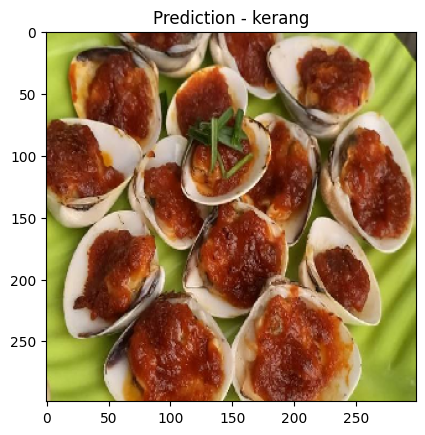

In [ ]:
predict_image('/content/drive/MyDrive/Capstone/test/kerang-bakar-parape-foto-resep-utama.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


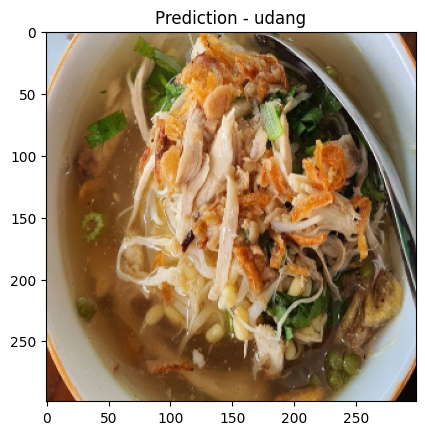

In [ ]:
predict_image('/content/drive/MyDrive/Capstone/test/soto-ayam-bening-segar_43.png',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


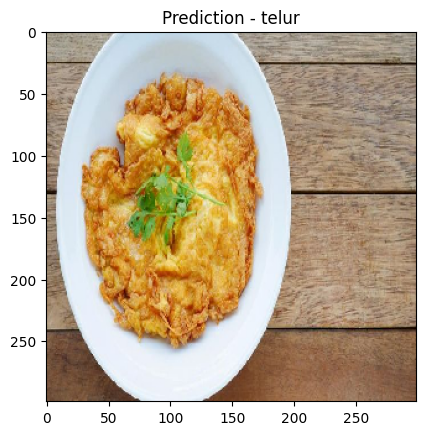

In [ ]:
predict_image('/content/drive/MyDrive/Capstone/test/telur-dadar-atau-omelette_169.jpeg',model)
# predict_image('/content/drive/MyDrive/Capstone/dataset/Sapi/Copy of empal_gepuk (1).png',model)

- <h3> Predicting category </h3>

In [ ]:
predict_dir("../input/indian-food-classification/test/masala_dosa",model)

NotADirectoryError: [Errno 20] Not a directory: '/content/drive/MyDrive/Capstone/test/soto-ayam-bening-segar_43.png'

## Let's plot a confusion matrix for all the food items

In [ ]:
test_preds = model.predict(test_generator)
test_preds_classes = np.argmax(test_preds, axis=1)
test_true_classes = test_generator.y

12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 735ms/step


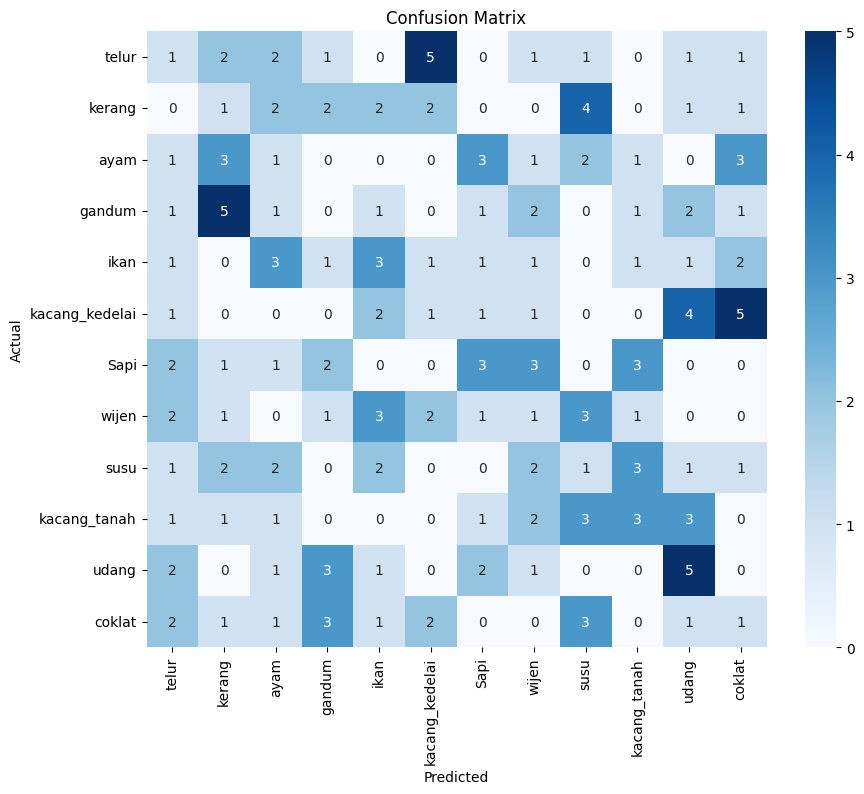

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Convert one-hot encoded true labels to class indices
test_true_classes = np.argmax(test_generator.y, axis=1)

# Generate confusion matrix
cm = confusion_matrix(test_true_classes, test_preds_classes)

# Define the class names based on your dataset
class_names = ['telur', 'kerang', 'ayam', 'gandum', 'ikan',
               'kacang_kedelai', 'Sapi', 'wijen', 'susu',
               'kacang_tanah', 'udang', 'coklat']

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
from tabulate import tabulate

# Generate classification report as a dictionary
report = classification_report(test_true_classes, test_preds_classes, target_names=class_names, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Print the classification report as a table using tabulate
print(tabulate(report_df, headers='keys', tablefmt='pipe', showindex=True))


|                |   precision |    recall |   f1-score |    support |
|:---------------|------------:|----------:|-----------:|-----------:|
| telur          |   0.0666667 | 0.0666667 |  0.0666667 |  15        |
| kerang         |   0.0588235 | 0.0666667 |  0.0625    |  15        |
| ayam           |   0.0666667 | 0.0666667 |  0.0666667 |  15        |
| gandum         |   0         | 0         |  0         |  15        |
| ikan           |   0.2       | 0.2       |  0.2       |  15        |
| kacang_kedelai |   0.0769231 | 0.0666667 |  0.0714286 |  15        |
| Sapi           |   0.230769  | 0.2       |  0.214286  |  15        |
| wijen          |   0.0666667 | 0.0666667 |  0.0666667 |  15        |
| susu           |   0.0588235 | 0.0666667 |  0.0625    |  15        |
| kacang_tanah   |   0.230769  | 0.2       |  0.214286  |  15        |
| udang          |   0.263158  | 0.333333  |  0.294118  |  15        |
| coklat         |   0.0666667 | 0.0666667 |  0.0666667 |  15        |
| accu

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K

# Clear the session if needed
# K.clear_session()

# Load your trained model
path_to_model = '/content/drive/My Drive/Capstone/Saved Model/Classification_Head_model_v1.keras'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

# Assuming you already have your test data (X_test, y_test)
# Make predictions
y_pred = model.predict(X_test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # If using a multi-class classification

# Get the true labels (y_test), assuming it's available
y_true = np.argmax(y_test, axis=1)  # If y_test is one-hot encoded, convert it to class labels

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Loading the model..
Done!
6/6 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
y_true,y_pred=labels_confusion_matrix()
print_confusion_matrix(y_true,y_pred)

<span style="font-size:21px;color:blue"><b>So far, So good!</b></span>
<hr>

<h1> <b> MODEL LEARNING VISUALIZATIONS </b></h1>

### SOME HELPER FUNCTIONS WHICH WILL ENABLE US TO VISUALIZE HOW NEURAL NETWORK WORKS AND PERFORMS!

In [ ]:
def get_activations(img, model_activations):
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.
    plt.imshow(img[0])
    plt.show()
    return model_activations.predict(img)

def show_activations(activations, layer_names):

    images_per_row = 16

    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names, activations):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :,col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()

def activation_conv():
    first_convlayer_activation = activations[0]
    second_convlayer_activation = activations[3]
    third_convlayer_activation = activations[6]
    f,ax = plt.subplots(1,3, figsize=(10,10))
    ax[0].imshow(first_convlayer_activation[0, :, :, 3], cmap='viridis')
    ax[0].axis('OFF')
    ax[0].set_title('Conv2d_1')
    ax[1].imshow(second_convlayer_activation[0, :, :, 3], cmap='viridis')
    ax[1].axis('OFF')
    ax[1].set_title('Conv2d_2')
    ax[2].imshow(third_convlayer_activation[0, :, :, 3], cmap='viridis')
    ax[2].axis('OFF')
    ax[2].set_title('Conv2d_3')


def get_attribution(food):

    tf.compat.v1.disable_eager_execution()

    img = image.load_img(food, target_size=(299, 299))
    img = image.img_to_array(img)
    img /= 255.
    f,ax = plt.subplots(1,3, figsize=(15,15))
    ax[0].imshow(img)

    img = np.expand_dims(img, axis=0)
    model = load_model('./model_v1_inceptionV3.h5')

    preds = model.predict(img)
    class_id = np.argmax(preds[0])
    ax[0].set_title("Input Image")
    class_output = model.output[:, class_id]
    last_conv_layer = model.get_layer("mixed10")

    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([img])
    for i in range(2048):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    ax[1].imshow(heatmap)
    ax[1].set_title("Heat map")


    act_img = cv2.imread(food)
    heatmap = cv2.resize(heatmap, (act_img.shape[1], act_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(act_img, 0.6, heatmap, 0.4, 0)
    cv2.imwrite('classactivation.png', superimposed)
    img_act = image.load_img('classactivation.png', target_size=(299, 299))
    ax[2].imshow(img_act)
    ax[2].set_title("Class Activation")
    plt.show()
    return preds

## MODEL LAYERS

In [ ]:
print("Total layers in the model : ",len(model.layers),"\n")

# We start with index 1 instead of 0, as input layer is at index 0
layers = [layer.output for layer in model.layers[1:11]]
# We now initialize a model which takes an input and outputs the above chosen layers
activations_output = models.Model(inputs=model.input, outputs=layers)
# print(layers)

layer_names = []
for layer in model.layers[1:11]:
    layer_names.append(layer.name)

print("First 10 layers which we can visualize are -> ", layer_names)


<span style="font-size:18px;color:blue"><b>Our model has 315 layers with InceptionV3 architecture!</b></span>
<br><br>
<span style="font-size:18px;color:blue"><b>Whoa! That's a lot to process at first, so let's just stick with 10 layers for now and visualize these first to see how neural networks classify.</b></span>
<hr>

# <b>LAYER WISE ACTIVATIONS</b>

In [ ]:
food = '../input/indian-food-classification/dataset/Dataset/val/pizza/155.jpg'
activations = get_activations(food,activations_output)
show_activations(activations, layer_names)

## Let's show the activation outputs of Conv2D layer (we have three of them in first 10 layers) to compare how layers get abstract with depth.

In [ ]:
activation_conv()

## This time let's visualize some other food item's layer.

In [ ]:
food = '../input/indian-food-classification/dataset/Dataset/val/idli/065.jpg'
activations = get_activations(food,activations_output)
show_activations(activations, layer_names)

In [ ]:
activation_conv()

<h2><span style="color:blue">NOW THIS IS WHERE THINGS WILL GET INTERESTING!</span></h2>

- <span style="font-size:17px;"> So far we were doing activation maps visualization which helped us understand how the input is transformed from one layer to another as it goes through several operations. </span>

- <span style="font-size:17px;"> At the end of training, we want the model to classify or detect objects based on features which are specific to the class.</span>

- <span style="font-size:17px;"> To validate how model attributes the features to class output, we can generate heat maps using gradients to find out which regions in the input images were instrumental in determining the class. </span>

# <b>GENERATING HEATMAPS</b>

In [ ]:
pred = get_attribution('../input/indian-food-classification/dataset/Dataset/val/idli/065.jpg')

In [ ]:
pred2=get_attribution('../input/indian-food-classification/test/fried_rice/images (5).jpg')

In [ ]:
pred3=get_attribution('../input/indian-food-classification/test/chai/images (3).jpg')

In [ ]:
pred4=get_attribution('../input/indian-food-classification/test/jalebi/images (4).jpg')

In [ ]:
pred5=get_attribution('../input/indian-food-classification/test/chole_bhature/images (10).jpg')

<h2><span style="color:green">WOW! WE DID IT!</span></h2>
<hr></hr>
<ol>
    <h3>
        <li>In the above plot, we see on left the input image passed to the model, heat map in the middle and the class activation map on right</li><br>
        <li>Heat map gives a visual of what regions in the image were used in determining the class of the image</li><br>
        <li>Now it's clearly visible what a model looks for in an image if it has to be classified as an idli!</li>
    </h3>
</ol>

## Downloading random image from net to predict and generate heatmap

In [ ]:
!wget -O download.jpg https://www.cookwithmanali.com/wp-content/uploads/2015/01/Restaurant-Style-Dal-Makhani-Recipe.jpg

model_load = load_model('./model_v1_inceptionV3.h5')

<span style="font-size:16px;"><b>This image was given to confuse the model as both classes <u>Butter naan</u> and <u>Dal makhni</u> are present. But it predicted dal makhni and why was that?<br><br>Because the output layer inside the model computed high activations for dal makhni object. It does happen sometimes due to centralized nature of model's focus area. </b></span>

In [ ]:
pred = get_attribution('download.jpg')

<hr>
<h2><div style="color:purple;text-align: center;font-weight:bold;">THANK YOU FOR BEARING WITH ME!</div></h2>
<hr>
<h2><center>If you liked this kernel or the yummy dataset, please consider upvoting.<br>Happy Kaggling.</center></h2>
<hr>
